In [2]:


try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
keras = tf.keras



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download 'ashishjangra27/gender-recognition-200k-images-celeba'

 99% 1.31G/1.32G [00:09<00:00, 176MB/s]
100% 1.32G/1.32G [00:09<00:00, 154MB/s]


In [ ]:
!unzip gender-recognition-200k-images-celeba.zip

In [6]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [7]:
IMAGE_SIZE = [224, 224]

In [8]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [9]:
for layer in vgg.layers:
  layer.trainable = False

In [10]:
folders = glob('/content/Dataset/Train/*')

In [11]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
model = Model(inputs=vgg.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory('/content/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 160000 images belonging to 2 classes.


In [19]:

test_set = test_datagen.flow_from_directory('/content/Dataset/Validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 22598 images belonging to 2 classes.


In [20]:
model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


5000/5000 [==============================] - 2095s 416ms/step - loss: 0.2243 - accuracy: 0.9257 - val_loss: 0.1789 - val_accuracy: 0.9469


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
model.save("/content/drive/MyDrive/models/vgg16-Gender Detection.h5")

In [23]:
img="/content/0.jpg"

In [31]:
from tensorflow.keras.preprocessing import image

image2=image.load_img(img,target_size=(224,224))

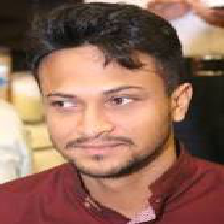

In [32]:
image2

In [34]:
img=image.img_to_array(image2)

In [35]:
img_tensor =np.expand_dims(img,axis=0)

In [36]:
model.predict(img_tensor)

array([[0., 1.]], dtype=float32)